# Dimensionality Reduction - PCA (Principal Component Analysis)
In this section, we apply PCA to reduce the dimensionality of our dataset while preserving as much variance as possible.
PCA transforms the original features into a new set of uncorrelated features called principal components, ordered by the amount of variance they capture

## Load the processed heart disease dataset and check its structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA


df_scaled = pd.read_csv('../Data/processed_heart.csv', header=0)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   trestbps     303 non-null    float64
 3   chol         303 non-null    float64
 4   fbs          303 non-null    float64
 5   thalach      303 non-null    float64
 6   exang        303 non-null    float64
 7   oldpeak      303 non-null    float64
 8   ca           303 non-null    float64
 9   target       303 non-null    int64  
 10  cp_2.0       303 non-null    int64  
 11  cp_3.0       303 non-null    int64  
 12  cp_4.0       303 non-null    int64  
 13  restecg_1.0  303 non-null    int64  
 14  restecg_2.0  303 non-null    int64  
 15  slope_2.0    303 non-null    int64  
 16  slope_3.0    303 non-null    int64  
 17  thal_6.0     303 non-null    int64  
 18  thal_7.0     303 non-null    int64  
 19  thal_?  

## Apply PCA for Dimensionality Reduction
Separate features (X) and target (y) from the dataset.

Perform PCA to reduce the features to 2 principal components.

Fit PCA on all components to calculate cumulative explained variance.

In [2]:
X = df_scaled.drop(df_scaled.columns[9], axis=1).values
y = df_scaled.iloc[:, 10].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_full = PCA()
pca_full.fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)


## Visualize PCA Results
Plot the first two principal components of the dataset.

Color points by their target class to observe any separation.

Use a colorbar to indicate the target values.

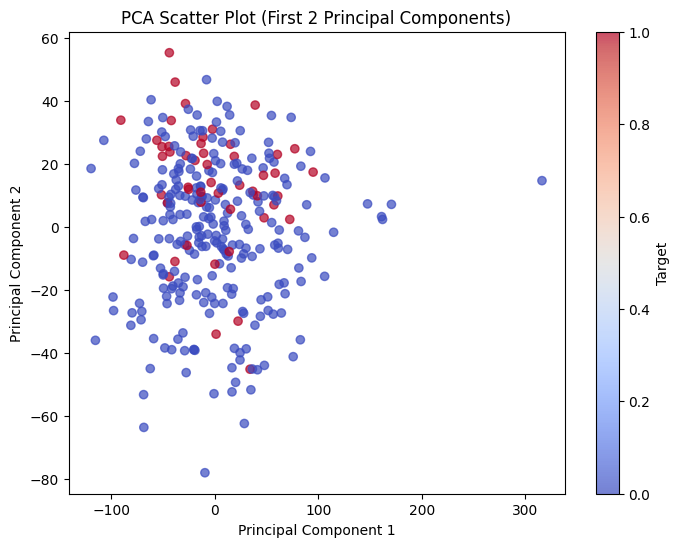

In [3]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Scatter Plot (First 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Target')
plt.show()

## Save PCA Transformed Data
Create a DataFrame from the PCA components with meaningful column names (PC1, PC2).

Add the target labels to the DataFrame.

Export the transformed dataset to a CSV file for later use.

In [4]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df.to_csv('../Data/pca_transformed.csv', index=False)